In [40]:
import pandas as pd
from sklearn.decomposition import PCA

In [41]:
dataset=pd.read_csv("sample.csv")
dataset.head()


,Age,Has_job,Own_House,Credit_Rating,Class
0,Young,False,False,fair,No
1,Young,False,False,good,No
2,Young,True,False,good,yes
3,Young,True,True,fair,yes
4,Young,False,False,fair,No


In [42]:
clmns=[]
for i in dataset:
    clmns.append(i)
feature=clmns[:-1]
print(clmns)
print(feature)

['Age', 'Has_job', 'Own_House', 'Credit_Rating', 'Class']
['Age', 'Has_job', 'Own_House', 'Credit_Rating']


In [43]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
o_value=OrdinalEncoder().fit_transform(dataset[clmns])
o_table=pd.DataFrame(o_value)
o_table.columns=clmns
o_table

,Age,Has_job,Own_House,Credit_Rating,Class
0,2.0,0.0,0.0,1.0,0.0
1,2.0,0.0,0.0,2.0,0.0
2,2.0,1.0,0.0,2.0,1.0
3,2.0,1.0,1.0,1.0,1.0
4,2.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,2.0,0.0
7,0.0,1.0,1.0,2.0,1.0
8,0.0,0.0,1.0,0.0,1.0
9,0.0,0.0,1.0,0.0,1.0


In [45]:
a=[]
for i in clmns:
    temp=[]
    for j in dataset[i].unique():
        temp.append(j)
    temp.sort()
    a.append(temp)
print(a)

[['Middle', 'Old', 'Young'], [False, True], [False, True], ['excellent', 'fair', 'good'], ['No', 'yes']]


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,t_test=train_test_split(o_table[feature],o_table["Class"],test_size=0.4,random_state=142)

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train);
X_test=sc.transform(X_test)

In [48]:
pca = PCA(n_components = int(input("Enter no.of Principle Components : ")))
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
final_table=pd.DataFrame(X_test)
final_table

Enter no.of Principle Components : 3


,0,1,2
0,-2.850059,1.427902,0.244364
1,1.397140,-0.155462,1.123472
2,-0.852885,-1.385789,1.877670
3,-0.283466,0.944190,-1.229837
4,-2.850059,1.427902,0.244364
5,0.170778,1.465801,2.690208


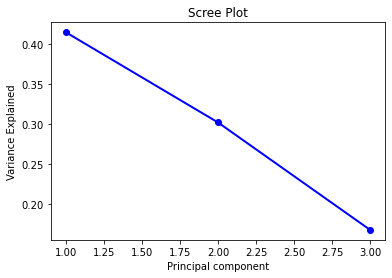

In [49]:
import matplotlib.pyplot as plt
import numpy as np
pc_vals=np.arange(pca.n_components_)+1
plt.plot(pc_vals,pca.explained_variance_ratio_,'o-',linewidth=2,color="blue")
plt.title("Scree Plot")
plt.xlabel('Principal component')
plt.ylabel('Variance Explained')
plt.show()